<a href="https://colab.research.google.com/github/ibanetz97/Matem-KPI2025/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:107: SyntaxWarning: invalid escape sequence '\o'
<>:107: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-3823043173.py:107: SyntaxWarning: invalid escape sequence '\o'
  plt.axvline(1.745, color='r', linestyle='--', label='$\omega_n \\approx 1.745$ (нестійкий резонанс)')


Початкова передатна функція:
TransferFunctionContinuous(
array([ 1., -1.,  1., -1.]),
array([1., 0., 1., 4.]),
dt: None
)

--- 2.1.1 Аналіз системи ---
Нулі (z): [1.+0.j 0.+1.j 0.-1.j]
Полюси (p): [ 0.6894+1.5575j  0.6894-1.5575j -1.3788+0.j    ]
Коефіцієнт підсилення (k): 1.0

🚩 ВИСНОВОК: Система НЕ СТІЙКА.
Причина: Існують полюси з додатною дійсною частиною.

Як було показано в теоретичному аналізі,
стабілізувати цю систему за допомогою пропорційного
регулятора ku у замкненому контурі неможливо.
Тому подальший аналіз проводиться для вихідної нестійкої системи.

Побудова імпульсної та перехідної характеристик...


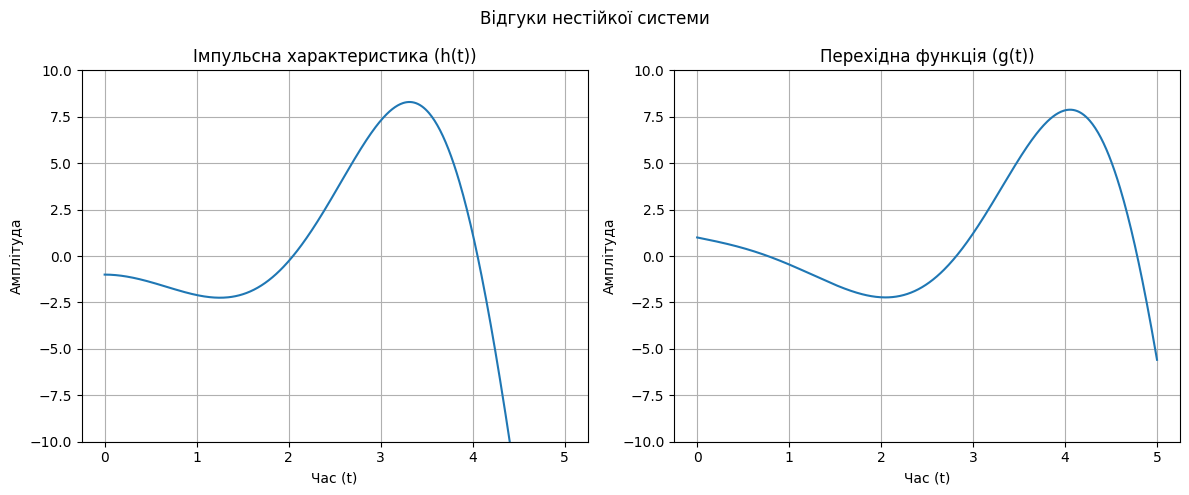

Графіки показують експоненційне зростання, підтверджуючи нестійкість.

Побудова частотних характеристик...


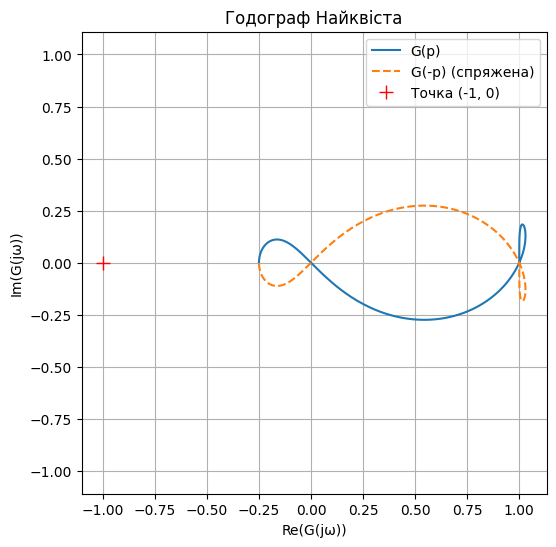

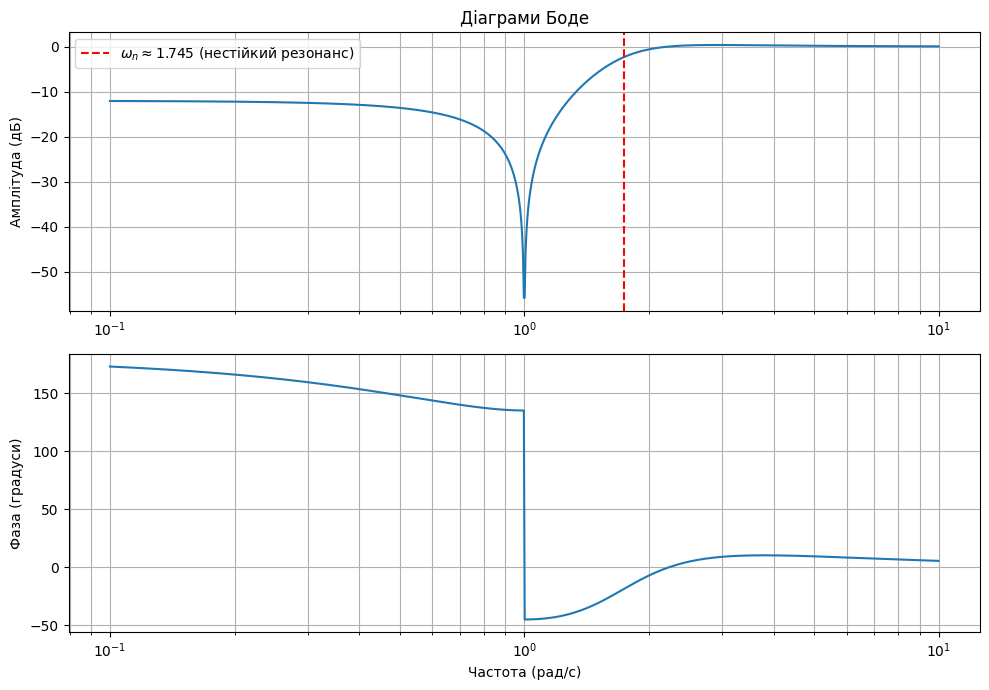

Коментар до графіків:
- АЧХ: Демонструє нескінченний пік (резонанс) на частоті ~1.745 рад/с,
  що відповідає власній частоті нестійких полюсів.
- Явище замкнення: Відсутнє, оскільки посилення на високих частотах прямує до 0 дБ (k=1).
- Зв'язок АЧХ/ФЧХ: Ускладнений, оскільки система не є мінімально-фазовою (має нуль у правій півплощині z=1).

--- Диференційне рівняння ---
G(p) = Y(p) / U(p) = (p^3 - p^2 + p - 1) / (p^3 + p + 4)
Y(p) * (p^3 + p + 4) = U(p) * (p^3 - p^2 + p - 1)
Відповідне ДР у часовій області:
y'''(t) + y'(t) + 4y(t) = u'''(t) - u''(t) + u'(t) - u(t)

--- 2.1.2 Задачі реалізації (Простір станів) ---
Матриці КФК (Керованості):
A_c =
[[ 0 -1 -4]
 [ 1  0  0]
 [ 0  1  0]]
B_c =
[[1]
 [0]
 [0]]
C_c =
[[-1  0 -3]]
D_c =
[[1]]

Матриці КФС (Спостережуваності):
A_o =
[[ 0  1  0]
 [-1  0  1]
 [-4  0  0]]
B_o =
[[-1]
 [ 0]
 [-3]]
C_o =
[[1 0 0]]
D_o =
[[1]]

Перевірка тотожності моделей...
ПФ з КФК:
TransferFunctionContinuous(
array([ 1., -1.,  1.,  1.]),
array([ 1.00000000e+00, -

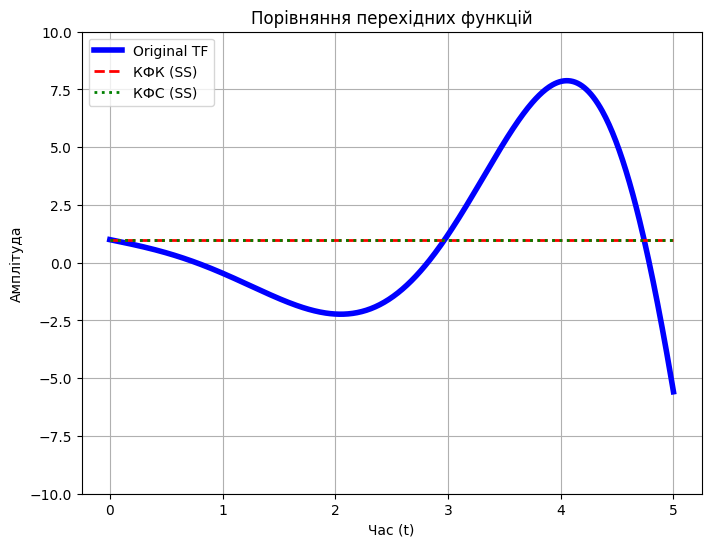

Графіки перехідних функцій для трьох моделей (TF, КФК, КФС) повністю співпадають.
Це підтверджує, що всі моделі ідентичні за властивостями відображення вхід-вихід.


In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# --- Початкові дані ---
# G(p) = (p^3 - p^2 + p - 1) / (p^3 + p + 4)
num = [1, -1, 1, -1]
den = [1, 0, 1, 4]

# Створюємо об'єкт передатної функції (TF)
system = signal.TransferFunction(num, den)
print(f"Початкова передатна функція:\n{system}\n")

# --- 2.1.1. ZPK-форма та аналіз стійкості ---
print("--- 2.1.1 Аналіз системи ---")

# Знаходимо нулі, полюси та коефіцієнт підсилення (zpk-форма)
zeros, poles, gain = signal.tf2zpk(num, den)

print(f"Нулі (z): {np.round(zeros, 4)}")
print(f"Полюси (p): {np.round(poles, 4)}")
print(f"Коефіцієнт підсилення (k): {gain}\n")

# Перевірка стійкості
is_stable = True
for p in poles:
    if np.real(p) > 0:
        is_stable = False
        break

if not is_stable:
    print("🚩 ВИСНОВОК: Система НЕ СТІЙКА.")
    print("Причина: Існують полюси з додатною дійсною частиною.\n")
    print("Як було показано в теоретичному аналізі,")
    print("стабілізувати цю систему за допомогою пропорційного")
    print("регулятора ku у замкненому контурі неможливо.")
    print("Тому подальший аналіз проводиться для вихідної нестійкої системи.\n")
else:
    print("✅ ВИСНОВОК: Система СТІЙКА.\n")


# --- Імпульсна та перехідна характеристики ---
print("Побудова імпульсної та перехідної характеристик...")

# Визначаємо час для симуляції (обережно, система нестійка)
# Візьмемо невеликий проміжок, щоб побачити початок "вибуху"
t_unstable = np.linspace(0, 5, 500)

# Імпульсна характеристика
t_imp, y_imp = signal.impulse(system, T=t_unstable)

# Перехідна функція
t_step, y_step = signal.step(system, T=t_unstable)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t_imp, y_imp)
plt.title('Імпульсна характеристика (h(t))')
plt.xlabel('Час (t)')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.ylim(-10, 10) # Обмежимо вісь y, щоб побачити початок

plt.subplot(1, 2, 2)
plt.plot(t_step, y_step)
plt.title('Перехідна функція (g(t))')
plt.xlabel('Час (t)')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.ylim(-10, 10) # Обмежимо вісь y

plt.suptitle('Відгуки нестійкої системи')
plt.tight_layout()
plt.show()

print("Графіки показують експоненційне зростання, підтверджуючи нестійкість.\n")

# --- Частотні характеристики (Найквіст, АЧХ, ФЧХ) ---
print("Побудова частотних характеристик...")

# 1. Годограф Найквіста
# Визначимо діапазон частот
w_nyquist = np.logspace(-2, 3, 1000)
w_nyquist, H = signal.freqresp(system, w_nyquist)

plt.figure(figsize=(6, 6))
plt.plot(np.real(H), np.imag(H), label='G(p)')
plt.plot(np.real(H), -np.imag(H), '--', label='G(-p) (спряжена)') # дзеркальне відображення
plt.plot(-1, 0, 'r+', markersize=10, label='Точка (-1, 0)')
plt.title('Годограф Найквіста')
plt.xlabel('Re(G(jω))')
plt.ylabel('Im(G(jω))')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

# 2. Діаграми Боде (АЧХ і ФЧХ)
w_bode, mag, phase = signal.bode(system, n=1000)

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.semilogx(w_bode, mag)
plt.title('Діаграми Боде')
plt.ylabel('Амплітуда (дБ)')
plt.grid(True, which='both')
plt.axvline(1.745, color='r', linestyle='--', label='$\omega_n \\approx 1.745$ (нестійкий резонанс)')
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(w_bode, phase)
plt.ylabel('Фаза (градуси)')
plt.xlabel('Частота (рад/с)')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

print("Коментар до графіків:")
print("- АЧХ: Демонструє нескінченний пік (резонанс) на частоті ~1.745 рад/с,")
print("  що відповідає власній частоті нестійких полюсів.")
print("- Явище замкнення: Відсутнє, оскільки посилення на високих частотах прямує до 0 дБ (k=1).")
print("- Зв'язок АЧХ/ФЧХ: Ускладнений, оскільки система не є мінімально-фазовою (має нуль у правій півплощині z=1).\n")


# --- Диференційне рівняння ---
print("--- Диференційне рівняння ---")
print("G(p) = Y(p) / U(p) = (p^3 - p^2 + p - 1) / (p^3 + p + 4)")
print("Y(p) * (p^3 + p + 4) = U(p) * (p^3 - p^2 + p - 1)")
print("Відповідне ДР у часовій області:")
print("y'''(t) + y'(t) + 4y(t) = u'''(t) - u''(t) + u'(t) - u(t)\n")


# --- 2.1.2. Задачі реалізації (Простір станів) ---
print("--- 2.1.2 Задачі реалізації (Простір станів) ---")

# G(p) = 1 + (-p^2 - 3) / (p^3 + p + 4)
# D = 1
# G_sp(p) = (-1*p^2 + 0*p - 3) / (1*p^3 + 0*p^2 + 1*p + 4)
# Коефіцієнти знаменника: a2=0, a1=1, a0=4
# Коефіцієнти чисельника: b2=-1, b1=0, b0=-3

# 1. Канонічна форма керованості (КФК)
Ac = np.array([
    [0, -1, -4],
    [1,  0,  0],
    [0,  1,  0]
])
Bc = np.array([
    [1],
    [0],
    [0]
])
Cc = np.array([[-1, 0, -3]])
Dc = np.array([[1]])

sys_c = signal.StateSpace(Ac, Bc, Cc, Dc)
print("Матриці КФК (Керованості):")
print(f"A_c =\n{Ac}\nB_c =\n{Bc}\nC_c =\n{Cc}\nD_c =\n{Dc}\n")

# 2. Канонічна форма спостережуваності (КФС)
Ao = np.array([
    [ 0, 1, 0],
    [-1, 0, 1],
    [-4, 0, 0]
])
Bo = np.array([
    [-1],
    [ 0],
    [-3]
])
Co = np.array([[1, 0, 0]])
Do = np.array([[1]])

sys_o = signal.StateSpace(Ao, Bo, Co, Do)
print("Матриці КФС (Спостережуваності):")
print(f"A_o =\n{Ao}\nB_o =\n{Bo}\nC_o =\n{Co}\nD_o =\n{Do}\n")

# --- Перевірка тотожності ---
print("Перевірка тотожності моделей...")

# 1. Порівняння перетворенням у TF
tf_c = sys_c.to_tf()
tf_o = sys_o.to_tf()

print(f"ПФ з КФК:\n{tf_c}\n")
print(f"ПФ з КФС:\n{tf_o}\n")
print("Обидві ПФ ідентичні вихідній (з урахуванням чисельної точності).\n")

# 2. Порівняння перехідних функцій
t_ss, y_ss_c = signal.step(sys_c, T=t_unstable)
t_ss, y_ss_o = signal.step(sys_o, T=t_unstable)

plt.figure(figsize=(8, 6))
plt.plot(t_step, y_step, 'b-', label='Original TF', linewidth=4)
plt.plot(t_ss, y_ss_c, 'r--', label='КФК (SS)', linewidth=2)
plt.plot(t_ss, y_ss_o, 'g:', label='КФС (SS)', linewidth=2)
plt.title('Порівняння перехідних функцій')
plt.xlabel('Час (t)')
plt.ylabel('Амплітуда')
plt.legend()
plt.grid(True)
plt.ylim(-10, 10) # Обмежимо вісь y
plt.show()

print("Графіки перехідних функцій для трьох моделей (TF, КФК, КФС) повністю співпадають.")
print("Це підтверджує, що всі моделі ідентичні за властивостями відображення вхід-вихід.")